# Grade: /100 points

# Assignment 01: Supervised learning, Linear models, and Loss functions

In this assignment, you're going to write your own methods to fit a linear model using either an OLS or LAD cost function.  

## Data set 

For this assignment, we will examine some data representing possums in Australia and New Guinea. The data frame contains 46 observations on the following 6 variables:

* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.

## Follow These Steps Before Submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


## Preliminaries

In [2]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
from sklearn import linear_model

%matplotlib inline


## Part 1
### Question 1.1:  /10 points


Read in the `possum.csv` file as a `pandas.DataFrame`.  Investigate the relationship between the possum's age and its tail length by plotting a scatter plot of the `age` and `tailL` columns. Add an `alpha`(transparency of the plotted dots) in case some data are overlapping. 

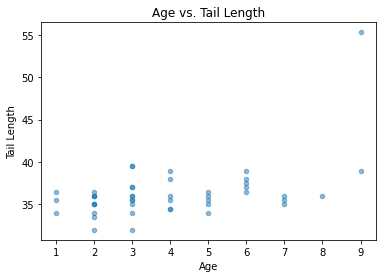

In [3]:
# Read in the data with pandas
possum_data = pd.read_csv('possum.csv')

possum_data.plot(x='age', y='tailL', kind='scatter', alpha=0.5)
plt.title('Age vs. Tail Length')
plt.xlabel('Age')
plt.ylabel('Tail Length')
plt.show()

# Make the scatter plot (don't forget the axis labels)


### Question 1.2: /5 point

Recall that the linear model, we obtain predictions by computing 

$$ \hat{\mathbf{y}} = \mathbf{X} \hat{\beta} $$

Here, $\mathbf{X}$ is a design matrix which includes a column of ones, $\hat{\beta}$ are coefficients, and $\hat{\mathbf{y}}$ are outcomes.  Write a function `linearModelPredict` to compute linear model predictions given data and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b` and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

Test the function by setting 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
```
and call your function with these values! 

Report $\hat{\mathbf{y}}$. 
What is the dimensionality of the numpy-array that you get back? 

Hint:  Read the documentation for `np.dot` or the `@` operator in `numpy`.

In [4]:
def linearModelPredict(b,X):
    yp = np.dot(X, b)
    return yp

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])

print('The returned array is 1D (1x3).')
print(linearModelPredict(b, X))

b2 = np.array([[0.1,1],[0.3,1]])
print('\nIf b is 2D, the returned array is 2D (3x2).')
print(linearModelPredict(b2, X))


The returned array is 1D (1x3).
[ 0.1 -0.2  0.7]

If b is 2D, the returned array is 2D (3x2).
[[ 0.1  1. ]
 [-0.2  0. ]
 [ 0.7  3. ]]


### Question 1.3: /15 points

Write a function `linearModelLossRSS` which computes and returns the loss function for an OLS model parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

**Written answer**: To minimize the cost do you need increase or decrease the value of the parameters? 

In [5]:
def linearModelLossRSS(b,X,y):
    # Get Model prediction
    predY = linearModelPredict(b, X)

    # Get the vector of residuals
    residuals = np.subtract(y, predY)

    # Get the residuals sum of squares
    residual_sum_of_squares = np.sum(np.square(residuals))

    # Get the gradient
    gradient = np.array([-2 * np.sum(residuals), -2 * np.sum(residuals * X[:,1])])

    return (residual_sum_of_squares, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

rss, gradient = linearModelLossRSS(b, X, y)

print('Loss: ', rss, '\nGradient: ', gradient)


Loss:  2.06 
Gradient:  [-3.6 -4. ]


## Written Answer
<i>To minimize the cost do you need increase or decrease the value of the parameters?</i>
<p>
To minimize the cost, the value of both parameters need to be increased because the b0 and b1 parameters are negative.

### Question 1.4:  /15 points. 

Now that you've implemented a loss function in question 1.3, it is now time to minimize it!

Write a function `linearModelFit` to fit a linear model.  The function should take as its first argument the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  `lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return the estimated betas and the R2. 

Test the function with the values: 
```
X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 
```

Report best parameters and the fitted R2 


In [6]:
def linearModelFit(X,y,lossfcn = linearModelLossRSS):

    # Set starting values
    bstart = [0, 0]

    # Call the optimization function
    RESULT = so.minimize(lossfcn, bstart, args=(X, y), jac=True)

    # Get estimated betas and rss
    estimated_betas = RESULT.x
    rss = RESULT.fun

    # Calculate R2
    mean = np.mean(y)
    R2 = 1 - (rss / (np.sum(np.square(y - mean))))

    return (estimated_betas, R2)

X = np.array([[1,0],[1,-1],[1,2]])
y = np.array([0,0.4,2]) 

best_params, r2 = linearModelFit(X, y)

print('Best parameters: ', best_params, '\nFitted R2: ', r2)

Best parameters:  [0.6 0.6] 
Fitted R2:  0.75


### Question 1.5: /15 points

Use the above functions to fit your model to the possum data. Then use your model and the fitted parameters to make predictions along a grid of equally spaced possum ages.  

Plot the data and add a line for the predicted values. You can get these by generating a new X-matrix with equally space ages (using for example np.linspace). Also report the R2 value for the fit. You can do this by either printing out the R2 of the fit or putting it on your plot via the `annotate` function in matplotlib.


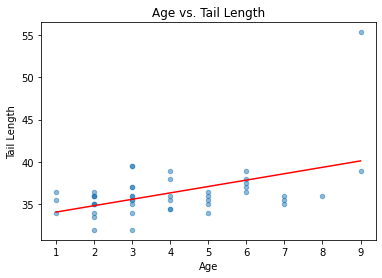

The R2 value for the fit is:  0.2228658794760413


In [7]:
# Make the design matrix using np.c_ 

# y = ...
y = possum_data['tailL'].to_numpy()

# X =  np.c_[...]
X = np.c_[np.ones(y.size), possum_data['age']]

# Call your fitting function 
params, r2 = linearModelFit(X, y, linearModelLossRSS)

# Create the scatter plot (see question 1.1)
possum_data.plot(x='age', y='tailL', kind='scatter', alpha=0.5)
plt.title('Age vs. Tail Length')
plt.xlabel('Age')
plt.ylabel('Tail Length')

# Create a new X matrix with equally space data 
Xline = np.c_[np.ones(100), np.linspace(possum_data['age'].min(), possum_data['age'].max(), 100)]
print(params, Xline)
yp = linearModelPredict(params, Xline)

# Add the line to the graph 
plt.plot(Xline[:, 1], yp, color = 'red')
plt.show()

# Report R2 
print('The R2 value for the fit is: ', r2)

## Part 2: LAD Regression

### Question 2.1:  /15 points

In the previous section, we worked with the squared loss.  Now, we'll implement a linear model with least absolute deviation loss.

Write a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by $\beta$, as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model, as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.

Test the function with the values 

```
X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
```

Report the loss and the gradient. 

In [8]:
def linearModelLossLAD(b,X,y):

    # Get predictions
    yp = np.dot(X, b)

    # Get the residuals
    residuals = np.subtract(y, yp)

    # Calculate the loss
    sum_abs_dev = np.sum(np.absolute(residuals))

    # Get the gradient
    gradient = np.array([-1 * np.sum(np.sign(residuals) - (residuals == 0)), -1 * np.sum((np.sign(residuals) - (residuals == 0)) * X[:,1])])

    return (sum_abs_dev, gradient)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 

loss, gradient = linearModelLossLAD(b,X,y)

print('Loss: ', loss, '\nGradient: ', gradient)



Loss:  2.0 
Gradient:  [-1. -1.]


### Question 2.2: /10 points


Use the above functions to fit your LAD model. Use your model to make predictions along a grid of equally spaced possum ages.  Once fit, add the fitted line to the scatter plot as in question 1.5.  Also report the R2-value. 

**Written answer**: What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?  

Note: If you recieve an error from the optimizer, it may be because the loss function for the LAD model is not differentiable at its minimum.  This will lead to some gradient based optimizers to fail to converge.  If this happens to you then pass `method="Powell"` to `scipy.optimize.minimize`.



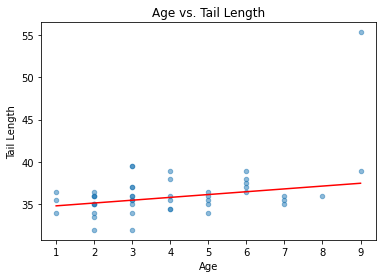

The R2 value for the fit is:  0.12937096211207766


In [9]:
def linearModelFitLAD(X,y,lossfcn):

    # Set starting values
    bstart = [0, 0]

    # Call the optimization function
    RESULT = so.minimize(lossfcn, bstart, args=(X, y), jac=True)

    # Get estimated betas and rss
    estimated_betas = RESULT.x
    lad = RESULT.fun

    # Calculate R2
    predY = linearModelPredict(estimated_betas, X)
    residuals = np.subtract(y, predY)
    rss = np.sum(np.square(residuals))

    mean = np.mean(y)
    R2 = 1 - (rss / (np.sum(np.square(y - mean))))

    return (estimated_betas, R2)

# Make the design matrix using np.c_ 

# y = ...
y = possum_data['tailL'].to_numpy()

# X =  np.c_[...]
X = np.c_[np.ones(y.size), possum_data['age']]

# Call your fitting function 
params, r2 = linearModelFitLAD(X, y, linearModelLossLAD)

# Create the scatter plot (see question 1.1)

possum_data.plot(x='age', y='tailL', kind='scatter', alpha=0.5)
plt.title('Age vs. Tail Length')
plt.xlabel('Age')
plt.ylabel('Tail Length')

# Create a new X matrix with equally space data 
Xline = np.c_[np.ones(100), np.linspace(possum_data['age'].min(), possum_data['age'].max(), 100)]
yp = linearModelPredict(params, Xline)

# Add the line to the graph 
plt.plot(Xline[:, 1], yp, color = 'red')
plt.show()

# Report R2 
print('The R2 value for the fit is: ', r2)

## Written answer
<i>What is the difference in the fit obtained with an L1 as compared to the L2 cost function? Which one has a higher R2 value? Why?</i>
<p>
The LAD fit doesn't get as impacted as the OLS fit by the outliers. This causes the OLS R2 value to be higher because it minimizes the RSS. The LAD fit has higher residuals due to the outliers, therefore resulting in a lower R2 value.

### Question 2.3: /15 points

Fit an OLS model to the possum data with the `linear_model` module from the `sklearn` package by using the `LinearRegression` class.  In no more than two sentences, comment on the rsquared values from `sklearn` and the rsquared values from your models. Are they similar?

In [10]:
y = possum_data['tailL'].to_numpy()
X = np.c_[np.ones(y.size), possum_data['age']]

reg = linear_model.LinearRegression().fit(X, y)
print('Sklearn R2 value: ', reg.score(X, y))

print('RSS R2 value: ', linearModelFit(X, y, linearModelLossRSS)[1])
print('LAD R2 value: ', linearModelFitLAD(X, y, linearModelLossLAD)[1])


Sklearn R2 value:  0.22286587947604108
RSS R2 value:  0.2228658794760413
LAD R2 value:  0.12937096211207766


## Written Answer
The sklearn R2 value and RSS R2 value are extremely similar, confirming that my model calculated it correctly. The LAD R2 value is slightly lower due to the outliers.